In [ ]:
!pip install rank_bm25

## **Data Exploration**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Final Project IR/Asset

/content/gdrive/MyDrive/Final Project IR/Asset


In [ ]:
import pandas as pd
pasien = pd.read_excel('pasien.xlsx')
pasien2 = pd.read_excel('pasien2.xlsx')
dokter = pd.read_excel('dokter.xlsx')
tindakan = pd.read_excel('rm_tindakan.xlsx')
spesialis = pd.read_excel('spesialis.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default sty

In [ ]:
pasien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mr                100 non-null    int64 
 1   klinik_id         100 non-null    int64 
 2   nama              100 non-null    object
 3   tanggal_lahir     100 non-null    object
 4   jk                100 non-null    object
 5   alamat            100 non-null    object
 6   no_telp           100 non-null    int64 
 7   pekerjaan         100 non-null    object
 8   penanggung_jawab  35 non-null     object
 9   foto              2 non-null      object
 10  created           100 non-null    object
 11  modified          100 non-null    object
 12  user_input        100 non-null    object
 13  user_modified     100 non-null    object
dtypes: int64(3), object(11)
memory usage: 11.1+ KB


In [ ]:
dokter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        100 non-null    int64  
 1   nama           100 non-null    object 
 2   no_telp        26 non-null     float64
 3   no_telp_2      15 non-null     float64
 4   spesialis      26 non-null     float64
 5   waktu_praktek  21 non-null     object 
 6   foto           15 non-null     object 
 7   alamat         26 non-null     object 
 8   tanggal_lahir  26 non-null     object 
 9   created        100 non-null    object 
 10  email          98 non-null     object 
 11  alumni         26 non-null     object 
 12  pekerjaan      26 non-null     object 
 13  provinsi_id    0 non-null      float64
 14  kota_id        26 non-null     float64
 15  jenis_kelamin  26 non-null     object 
dtypes: float64(5), int64(1), object(10)
memory usage: 12.6+ KB


In [ ]:
tindakan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             100 non-null    int64 
 1   rm_id          100 non-null    int64 
 2   tindakan_id    100 non-null    int64 
 3   nama_tindakan  100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [ ]:
pasien

,mr,klinik_id,nama,tanggal_lahir,jk,alamat,no_telp,pekerjaan,penanggung_jawab,foto,created,modified,user_input,user_modified
0,103000001,103,Rizki Pratama,1949-01-01,Perempuan,Jakarta,83409474438,Guru,Almrhm,NaN,2016-08-26 10:35:30,2016-08-26 05:35:30,wellyananto76@gmail.com,wellyananto76@gmail.com
1,103000002,103,Siti Aisyah,2016-08-27,Perempuan,Surabaya,89952361104,Dokter,Tn Dana,NaN,2016-08-27 07:05:34,2016-08-27 02:05:34,wellyananto76@gmail.com,wellyananto76@gmail.com
2,103000003,103,Adi Wijaya,2016-08-27,Perempuan,Bandung,82304593232,Perawat,Tn Tatang,NaN,2016-08-27 07:08:51,2016-08-27 02:08:51,wellyananto76@gmail.com,wellyananto76@gmail.com
3,103000004,103,Putri Damayanti,2016-08-27,Perempuan,Medan,80409246696,Insinyur,Tn sa'an,NaN,2016-08-27 07:10:37,2016-08-27 02:10:37,wellyananto76@gmail.com,wellyananto76@gmail.com
4,103000005,103,Fauzan Akbar,2016-08-27,Laki-Laki,Semarang,82381365416,Penjual,Ny.karmini,NaN,2016-08-27 08:00:04,2016-08-27 03:00:04,wellyananto76@gmail.com,wellyananto76@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,109000074,109,Zoey Utami,1991-08-02,Perempuan,Serang,82176763905,Ahli Filsafat,NaN,NaN,2016-11-30 17:04:24,2016-11-30 11:04:24,indosehat,indosehat
96,109000075,109,Logan Chen,1982-05-24,Perempuan,Cimahi.,85875472095,Penyunting Buku,NaN,NaN,2016-11-30 17:06:10,2016-11-30 11:06:10,indosehat,indosehat
97,109000076,109,Mia Rodriguez,1994-01-21,Perempuan,Semarang,85468856911,Pengawas Keamanan,NaN,NaN,2016-11-30 17:07:43,2016-11-30 11:07:43,indosehat,indosehat
98,109000077,109,Carter Surya,1991-02-08,Perempuan,Surakarta,84849983129,Pemilik Restoran,NaN,NaN,2016-11-30 17:09:23,2016-11-30 11:09:23,indosehat,indosehat


In [ ]:
pasien['mr'].unique()

array([103000001, 103000002, 103000003, 103000004, 103000005, 103000006,
       103000007, 103000008, 103000009, 103000010, 103000011, 103000012,
       108000001, 108000002, 108000003, 108000004, 108000005, 108000006,
       108000007, 108000008, 108000009, 108000010, 108000011, 109000001,
       109000002, 109000003, 109000004, 109000005, 109000006, 109000007,
       109000008, 109000009, 109000010, 109000011, 109000012, 109000013,
       109000015, 109000016, 109000017, 109000018, 109000019, 109000020,
       109000021, 109000022, 109000023, 109000024, 109000025, 109000026,
       109000027, 109000028, 109000029, 109000030, 109000031, 109000032,
       109000033, 109000034, 109000035, 109000036, 109000037, 109000038,
       109000039, 109000040, 109000041, 109000042, 109000043, 109000044,
       109000045, 109000046, 109000047, 109000048, 109000049, 109000050,
       109000051, 109000052, 109000053, 109000054, 109000055, 109000056,
       109000057, 109000058, 109000059, 109000060, 

In [ ]:
pasien2

,mr,klinik_id,nama,tanggal_lahir,jk,alamat,no_telp,pekerjaan,penanggung_jawab,foto,created,modified,user_input,user_modified
0,103000001,103,Rizki Pratama,1949-01-01,Laki-Laki,Jakarta,83409474438,Guru,Almrhm,NaN,2016-08-26 10:35:30,2016-08-26 05:35:30,wellyananto76@gmail.com,wellyananto76@gmail.com
1,103000002,103,Siti Aisyah,2016-08-27,Perempuan,Surabaya,89952361104,Dokter,Tn Dana,NaN,2016-08-27 07:05:34,2016-08-27 02:05:34,wellyananto76@gmail.com,wellyananto76@gmail.com
2,103000003,103,Adi Wijaya,2016-08-27,Laki-Laki,Bandung,82304593232,Perawat,Tn Tatang,NaN,2016-08-27 07:08:51,2016-08-27 02:08:51,wellyananto76@gmail.com,wellyananto76@gmail.com
3,103000004,103,Putri Damayanti,2016-08-27,Perempuan,Medan,80409246696,Insinyur,Tn sa'an,NaN,2016-08-27 07:10:37,2016-08-27 02:10:37,wellyananto76@gmail.com,wellyananto76@gmail.com
4,103000005,103,Fauzan Akbar,2016-08-27,Laki-Laki,Semarang,82381365416,Penjual,Ny.karmini,NaN,2016-08-27 08:00:04,2016-08-27 03:00:04,wellyananto76@gmail.com,wellyananto76@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,109000074,109,Zoey Utami,1991-08-02,Perempuan,Serang,82176763905,Ahli Filsafat,NaN,NaN,2016-11-30 17:04:24,2016-11-30 11:04:24,indosehat,indosehat
96,109000075,109,Logan Chen,1982-05-24,Laki-Laki,Cimahi.,85875472095,Penyunting Buku,NaN,NaN,2016-11-30 17:06:10,2016-11-30 11:06:10,indosehat,indosehat
97,109000076,109,Mia Rodriguez,1994-01-21,Perempuan,Semarang,85468856911,Pengawas Keamanan,NaN,NaN,2016-11-30 17:07:43,2016-11-30 11:07:43,indosehat,indosehat
98,109000077,109,Carter Surya,1991-02-08,Perempuan,Surakarta,84849983129,Pemilik Restoran,NaN,NaN,2016-11-30 17:09:23,2016-11-30 11:09:23,indosehat,indosehat


In [ ]:
pasien2['mr'].unique()

array([103000001, 103000002, 103000003, 103000004, 103000005, 103000006,
       103000007, 103000008, 103000009, 103000010, 103000011, 103000012,
       108000001, 108000002, 108000003, 108000004, 108000005, 108000006,
       108000007, 108000008, 108000009, 108000010, 108000011, 109000001,
       109000002, 109000003, 109000004, 109000005, 109000006, 109000007,
       109000008, 109000009, 109000010, 109000011, 109000012, 109000013,
       109000015, 109000016, 109000017, 109000018, 109000019, 109000020,
       109000021, 109000022, 109000023, 109000024, 109000025, 109000026,
       109000027, 109000028, 109000029, 109000030, 109000031, 109000032,
       109000033, 109000034, 109000035, 109000036, 109000037, 109000038,
       109000039, 109000040, 109000041, 109000042, 109000043, 109000044,
       109000045, 109000046, 109000047, 109000048, 109000049, 109000050,
       109000051, 109000052, 109000053, 109000054, 109000055, 109000056,
       109000057, 109000058, 109000059, 109000060, 

In [ ]:
dokter

,user_id,nama,no_telp,no_telp_2,spesialis,waktu_praktek,foto,alamat,tanggal_lahir,created,email,alumni,pekerjaan,provinsi_id,kota_id,jenis_kelamin
0,8,[Isi Nama Anda],NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-07 21:47:29,gunturbudi,NaN,NaN,NaN,NaN,NaN
1,13,Andrianto,8.520046e+10,8.121707e+10,1.0,14.00 WIT,img/dokter/13.jpeg,Asrama CPM Puncak Bahari Sorong,1990-05-25,2016-08-07 21:47:29,4ndri19@gmail.com,Universitas Islam Indonesia,Dokter,NaN,3413.0,Laki Laki
2,14,[Isi Nama Anda],NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-07 21:47:29,achmadakbarramadhan@gmail.com,NaN,NaN,NaN,NaN,NaN
3,15,[Isi Nama Anda],NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-07 21:47:29,achmadfaqih2606@gmail.com,NaN,NaN,NaN,NaN,NaN
4,16,[Isi Nama Anda],NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-07 21:47:29,aldidokter@gmail.com,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,111,dr_lukman,8.213376e+10,NaN,1.0,Senin,img/dokter/111.jpg,Jl. Soepomo no. 109,1980-10-31,2016-08-09 07:35:51,Lukmanh@ugm.ac.id,UGM,Dosen,NaN,1501.0,Laki Laki
96,112,Yudhistya,8.213425e+10,NaN,28.0,NaN,img/dokter/112.jpg,RS Indosehat Karanganyar,1983-08-04,2016-08-09 08:52:12,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki
97,113,dr_guntur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11 04:46:03,NaN,NaN,NaN,NaN,NaN,NaN
98,114,dr Yudhistya SpOG,2.717881e+09,NaN,28.0,NaN,NaN,Kebakkramat,1983-08-04,2016-08-11 13:38:40,rs.indosehat@yahoo.co.id,UGM,Rumah Sakit,NaN,1411.0,Laki Laki


In [ ]:
dokter.isnull().sum()

user_id            0
nama               0
no_telp           74
no_telp_2         85
spesialis         74
waktu_praktek     79
foto              85
alamat            74
tanggal_lahir     74
created            0
email              2
alumni            74
pekerjaan         74
provinsi_id      100
kota_id           74
jenis_kelamin     74
dtype: int64

In [ ]:
tindakan

,id,rm_id,tindakan_id,nama_tindakan
0,2,1,112,Umum
1,4,2,112,Umum
2,5,3,112,Umum
3,7,5,112,Umum
4,8,4,112,Umum
...,...,...,...,...
95,239,72,122,USG
96,240,73,115,Konsultasi
97,241,73,122,USG
98,242,108,115,Konsultasi


In [ ]:
tindakan['Tindakan Akhir'] = tindakan.groupby('rm_id')['nama_tindakan'].transform(lambda x: ' '.join(x))
tindakan.drop_duplicates(subset = ['rm_id'], inplace = True)
tindakan

,id,rm_id,tindakan_id,nama_tindakan,Tindakan Akhir
0,2,1,112,Umum,Umum
1,4,2,112,Umum,Umum
2,5,3,112,Umum,Umum
3,7,5,112,Umum,Umum
4,8,4,112,Umum,Umum
...,...,...,...,...,...
93,237,106,122,USG,USG
94,238,72,115,Konsultasi,Konsultasi USG
96,240,73,115,Konsultasi,Konsultasi USG
98,242,108,115,Konsultasi,Konsultasi


In [ ]:
spesialis

,spesialis_id,nama
0,1,Umum
1,2,Gigi
2,3,Anak
3,4,Anestesiologi
4,5,Andrologi
5,6,Akupunktur Klinik
6,7,Bedah
7,8,Bedah Anak
8,9,Bedah Mulut dan Maksilofasial
9,10,Bedah Plastik Rekonstruksi dan Estetik


In [ ]:
pasien_all = pd.concat([pasien, pasien2], axis = 0)
pasien_all.head(5)

,mr,klinik_id,nama,tanggal_lahir,jk,alamat,no_telp,pekerjaan,penanggung_jawab,foto,created,modified,user_input,user_modified
0,103000001,103,Rizki Pratama,1949-01-01,Perempuan,Jakarta,83409474438,Guru,Almrhm,NaN,2016-08-26 10:35:30,2016-08-26 05:35:30,wellyananto76@gmail.com,wellyananto76@gmail.com
1,103000002,103,Siti Aisyah,2016-08-27,Perempuan,Surabaya,89952361104,Dokter,Tn Dana,NaN,2016-08-27 07:05:34,2016-08-27 02:05:34,wellyananto76@gmail.com,wellyananto76@gmail.com
2,103000003,103,Adi Wijaya,2016-08-27,Perempuan,Bandung,82304593232,Perawat,Tn Tatang,NaN,2016-08-27 07:08:51,2016-08-27 02:08:51,wellyananto76@gmail.com,wellyananto76@gmail.com
3,103000004,103,Putri Damayanti,2016-08-27,Perempuan,Medan,80409246696,Insinyur,Tn sa'an,NaN,2016-08-27 07:10:37,2016-08-27 02:10:37,wellyananto76@gmail.com,wellyananto76@gmail.com
4,103000005,103,Fauzan Akbar,2016-08-27,Laki-Laki,Semarang,82381365416,Penjual,Ny.karmini,NaN,2016-08-27 08:00:04,2016-08-27 03:00:04,wellyananto76@gmail.com,wellyananto76@gmail.com


In [ ]:
rekmed = pd.read_excel('rekam_medis.xlsx')
rekmed

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,rm_id,user_id,kunjungan_id,mr,tekanan_darah,nadi,respirasi_rate,suhu,berat_badan,tinggi_badan,...,keluhan_utama,anamnesis,pemeriksaan_fisik,hasil_penunjang,deskripsi_tindakan,saran_pemeriksaan,alergi_obat,created,modified,locked
0,1,112,1,108000001,100/90,80.0,NaN,NaN,70.0,170.0,...,Batuk 2 minggu,<p>batuk belum sembuh</p><p>Sudah berobat</p><...,Ku baik,NaN,NaN,NaN,NaN,2016-08-10 07:33:45,2016-08-10 03:14:09,1
1,2,112,2,108000002,100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-10 08:25:11,2016-08-10 03:28:21,1
2,3,112,3,108000003,321321,2312.0,21.0,121.0,21.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-10 09:30:10,NaN,1
3,4,112,4,108000002,100,NaN,NaN,NaN,NaN,NaN,...,<p>ananjaaj</p>,<p>dhjsjsksi</p>,NaN,NaN,NaN,NaN,NaN,2016-08-11 09:43:58,2016-08-11 05:05:21,1
4,5,112,4,108000002,100,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11 09:45:56,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,230,107,225000002,120/90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-05 18:30:30,2016-10-05 13:30:36,1
96,99,230,108,225000005,110/80,NaN,NaN,NaN,NaN,NaN,...,<p>batuk</p>,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-05 19:40:58,2016-10-05 14:41:57,1
97,100,230,109,225000004,110/80,NaN,NaN,NaN,NaN,NaN,...,<p>sakit kepala</p>,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-05 19:49:10,2016-10-05 14:54:24,1
98,101,112,79,108000008,NaN,NaN,NaN,NaN,NaN,NaN,...,<p>Keluh</p>,<p>sub</p>,<p>onb</p>,NaN,NaN,NaN,NaN,2016-10-06 10:26:25,NaN,0


In [ ]:
rekmed['mr'].unique()

array([108000001, 108000002, 108000003, 108000004, 109000001, 109000002,
       109000003, 109000004, 109000005, 109000006, 111000001, 108000005,
       109000007, 109000008, 109000009, 109000010, 109000012,  36000001,
       109000017, 109000013, 109000016, 103000001,  29000001, 109000018,
       109000019, 109000020, 109000021, 109000022,  89000001, 109000023,
       109000024, 109000025, 108000006,  95000001, 109000027,  32000001,
       109000026, 109000028,  36000002, 109000029, 109000030, 109000031,
       125000001, 109000032, 108000007,   2000002, 109000033, 109000034,
       109000035, 109000036, 109000037,  49000001,  36000003,  36000004,
        36000005, 206000001, 201000001, 208000001, 198000001, 197000001,
       225000001, 225000002, 225000003, 182000001, 225000005, 225000004,
       108000008])

In [ ]:
rekmed.isnull().sum()

rm_id                  0
user_id                0
kunjungan_id           0
mr                     0
tekanan_darah         28
nadi                  59
respirasi_rate        63
suhu                  64
berat_badan           62
tinggi_badan          77
bmi                   77
assesment             87
plan                  85
keluhan_utama         30
anamnesis             32
pemeriksaan_fisik     54
hasil_penunjang       77
deskripsi_tindakan    64
saran_pemeriksaan     73
alergi_obat           92
created                0
modified              37
locked                 0
dtype: int64

In [ ]:
kunjungan = pd.read_excel('kunjungan.xlsx')
kunjungan

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,kunjungan_id,klinik_id,dokter_periksa,mr,tanggal_periksa,jam_masuk,jam_selesai,status,created,user_input,user_id
0,1,108,112.0,108000001,2016-08-10,2016-08-10 07:29:34,2016-08-10 08:14:09,selesai,2016-08-10 02:29:34,huroncom@gmail.com,112
1,2,108,NaN,108000002,2016-08-10,2016-08-10 07:30:23,2016-08-10 08:28:21,selesai,NaN,huroncom@gmail.com,112
2,3,108,NaN,108000003,2016-08-10,2016-08-10 09:29:38,2016-08-10 09:30:10,selesai,NaN,huroncom@gmail.com,112
3,4,108,112.0,108000002,2016-08-11,2016-08-11 09:43:34,2016-08-11 10:05:22,selesai,2016-08-11 04:43:34,huroncom@gmail.com,112
4,5,108,111.0,108000001,2016-08-11,2016-08-11 10:17:50,2016-08-11 10:19:18,selesai,2016-08-11 05:17:50,huroncom@gmail.com,112
...,...,...,...,...,...,...,...,...,...,...,...
95,105,225,230.0,225000002,2016-10-05,2016-10-05 17:26:13,2016-10-05 17:30:51,selesai,2016-10-05 12:26:13,andiangga85@gmail.com,230
96,106,182,191.0,182000001,2016-10-05,2016-10-05 18:01:28,2016-10-05 18:03:49,antri obat,2016-10-05 13:01:28,Lanangdian04@gmail.com,191
97,107,225,230.0,225000002,2016-10-05,2016-10-05 18:27:07,2016-10-05 18:30:36,selesai,2016-10-05 13:27:07,andiangga85@gmail.com,230
98,108,225,NaN,225000005,2016-10-05,2016-10-05 19:32:25,2016-10-05 19:41:57,selesai,NaN,andiangga85@gmail.com,230


## **Merging Dataset**

**Merge Dataset Rekmed with Patient**

In [ ]:
df = pd.merge(rekmed, pasien, on= 'mr', how = 'left')
df

,rm_id,user_id,kunjungan_id,mr,tekanan_darah,nadi,respirasi_rate,suhu,berat_badan,tinggi_badan,...,jk,alamat,no_telp,pekerjaan,penanggung_jawab,foto,created_y,modified_y,user_input,user_modified
0,1,112,1,108000001,100/90,80.0,NaN,NaN,70.0,170.0,...,Laki-Laki,Pekanbaru,8.340947e+10,Mahasiswa,NaN,NaN,2016-08-10 07:27:03,2016-08-10 02:27:03,huroncom@gmail.com,huroncom@gmail.com
1,2,112,2,108000002,100,NaN,NaN,NaN,NaN,NaN,...,Laki-Laki,Bogor,8.995236e+10,Petani,NaN,NaN,2016-08-10 07:30:23,2016-08-10 02:30:23,huroncom@gmail.com,huroncom@gmail.com
2,3,112,3,108000003,321321,2312.0,21.0,121.0,21.0,12.0,...,Laki-Laki,Bandar Lampung,8.230459e+10,Tukang Kayu,lsdmfld;mf,NaN,2016-08-10 09:29:38,2016-08-10 04:29:38,huroncom@gmail.com,huroncom@gmail.com
3,4,112,4,108000002,100,NaN,NaN,NaN,NaN,NaN,...,Laki-Laki,Bogor,8.995236e+10,Petani,NaN,NaN,2016-08-10 07:30:23,2016-08-10 02:30:23,huroncom@gmail.com,huroncom@gmail.com
4,5,112,4,108000002,100,20.0,NaN,NaN,NaN,NaN,...,Laki-Laki,Bogor,8.995236e+10,Petani,NaN,NaN,2016-08-10 07:30:23,2016-08-10 02:30:23,huroncom@gmail.com,huroncom@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,230,107,225000002,120/90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,99,230,108,225000005,110/80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,100,230,109,225000004,110/80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,101,112,79,108000008,NaN,NaN,NaN,NaN,NaN,NaN,...,Laki-Laki,Cimahi,8.394199e+10,Pejabat Pemerintah,NaN,NaN,2016-09-24 10:12:37,2016-09-24 05:12:37,dr_lukman,dr_lukman


**Merge Dataset Rekmed with Doctor**

In [ ]:
df = pd.merge(df, dokter, on = 'user_id', how = 'left')
df

,rm_id,user_id,kunjungan_id,mr,tekanan_darah,nadi,respirasi_rate,suhu,berat_badan,tinggi_badan,...,foto_y,alamat_y,tanggal_lahir_y,created,email,alumni,pekerjaan_y,provinsi_id,kota_id,jenis_kelamin
0,1,112,1,108000001,100/90,80.0,NaN,NaN,70.0,170.0,...,img/dokter/112.jpg,RS Indosehat Karanganyar,1983-08-04,2016-08-09 08:52:12,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki
1,2,112,2,108000002,100,NaN,NaN,NaN,NaN,NaN,...,img/dokter/112.jpg,RS Indosehat Karanganyar,1983-08-04,2016-08-09 08:52:12,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki
2,3,112,3,108000003,321321,2312.0,21.0,121.0,21.0,12.0,...,img/dokter/112.jpg,RS Indosehat Karanganyar,1983-08-04,2016-08-09 08:52:12,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki
3,4,112,4,108000002,100,NaN,NaN,NaN,NaN,NaN,...,img/dokter/112.jpg,RS Indosehat Karanganyar,1983-08-04,2016-08-09 08:52:12,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki
4,5,112,4,108000002,100,20.0,NaN,NaN,NaN,NaN,...,img/dokter/112.jpg,RS Indosehat Karanganyar,1983-08-04,2016-08-09 08:52:12,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,230,107,225000002,120/90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,99,230,108,225000005,110/80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,100,230,109,225000004,110/80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,101,112,79,108000008,NaN,NaN,NaN,NaN,NaN,NaN,...,img/dokter/112.jpg,RS Indosehat Karanganyar,1983-08-04,2016-08-09 08:52:12,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki


**Merge Dataset Rekmed with Tindakan**

In [ ]:
df = pd.merge(df, tindakan, on = 'rm_id', how = 'left')
df

,rm_id,user_id,kunjungan_id,mr,tekanan_darah,nadi,respirasi_rate,suhu,berat_badan,tinggi_badan,...,email,alumni,pekerjaan_y,provinsi_id,kota_id,jenis_kelamin,id,tindakan_id,nama_tindakan,Tindakan Akhir
0,1,112,1,108000001,100/90,80.0,NaN,NaN,70.0,170.0,...,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki,2.0,112.0,Umum,Umum
1,2,112,2,108000002,100,NaN,NaN,NaN,NaN,NaN,...,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki,4.0,112.0,Umum,Umum
2,3,112,3,108000003,321321,2312.0,21.0,121.0,21.0,12.0,...,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki,5.0,112.0,Umum,Umum
3,4,112,4,108000002,100,NaN,NaN,NaN,NaN,NaN,...,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki,8.0,112.0,Umum,Umum
4,5,112,4,108000002,100,20.0,NaN,NaN,NaN,NaN,...,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki,7.0,112.0,Umum,Umum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,230,107,225000002,120/90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,99,230,108,225000005,110/80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,100,230,109,225000004,110/80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,255.0,Injeksi,Injeksi kolesterol asam urat gula
98,101,112,79,108000008,NaN,NaN,NaN,NaN,NaN,NaN,...,huroncom@gmail.com,UGM,Dokter,NaN,1411.0,Laki Laki,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['rm_id', 'user_id', 'kunjungan_id', 'mr', 'tekanan_darah', 'nadi',
       'respirasi_rate', 'suhu', 'berat_badan', 'tinggi_badan', 'bmi',
       'assesment', 'plan', 'keluhan_utama', 'anamnesis', 'pemeriksaan_fisik',
       'hasil_penunjang', 'deskripsi_tindakan', 'saran_pemeriksaan',
       'alergi_obat', 'created_x', 'modified_x', 'locked', 'klinik_id',
       'nama_x', 'tanggal_lahir_x', 'jk', 'alamat_x', 'no_telp_x',
       'pekerjaan_x', 'penanggung_jawab', 'foto_x', 'created_y', 'modified_y',
       'user_input', 'user_modified', 'nama_y', 'no_telp_y', 'no_telp_2',
       'spesialis', 'waktu_praktek', 'foto_y', 'alamat_y', 'tanggal_lahir_y',
       'created', 'email', 'alumni', 'pekerjaan_y', 'provinsi_id', 'kota_id',
       'jenis_kelamin', 'id', 'tindakan_id', 'nama_tindakan',
       'Tindakan Akhir'],
      dtype='object')

In [ ]:
df['nama_y']

0              Yudhistya
1              Yudhistya
2              Yudhistya
3              Yudhistya
4              Yudhistya
             ...        
139    dr Yudhistya SpOG
140                Welly
141                Welly
142            dr_lukman
143            dr_lukman
Name: nama_y, Length: 144, dtype: object

**Simplify the Dataset**

In [ ]:
final_dataset = df[['nama_x', 'nama_y', 'Tindakan Akhir']]
final_dataset

,nama_x,nama_y,Tindakan Akhir
0,Sri Wahyuni,Yudhistya,Umum
1,Dian Kusuma,Yudhistya,Umum
2,Ahmad Surya,Yudhistya,Umum
3,Dian Kusuma,Yudhistya,Umum
4,Dian Kusuma,Yudhistya,Umum
...,...,...,...
95,NaN,NaN,NaN
96,NaN,NaN,NaN
97,NaN,NaN,Injeksi kolesterol asam urat gula
98,Nurul Hikmah,Yudhistya,NaN


In [ ]:
final_dataset = final_dataset.rename(columns = {'nama_x':'Pasien', 'nama_y': 'Dokter', 'Tindakan Akhir':'Tindakan'})
final_dataset

,Pasien,Dokter,Tindakan
0,Sri Wahyuni,Yudhistya,Umum
1,Dian Kusuma,Yudhistya,Umum
2,Ahmad Surya,Yudhistya,Umum
3,Dian Kusuma,Yudhistya,Umum
4,Dian Kusuma,Yudhistya,Umum
...,...,...,...
95,NaN,NaN,NaN
96,NaN,NaN,NaN
97,NaN,NaN,Injeksi kolesterol asam urat gula
98,Nurul Hikmah,Yudhistya,NaN


In [ ]:
final_dataset.isnull().sum()

Pasien      36
Dokter      21
Tindakan    23
dtype: int64

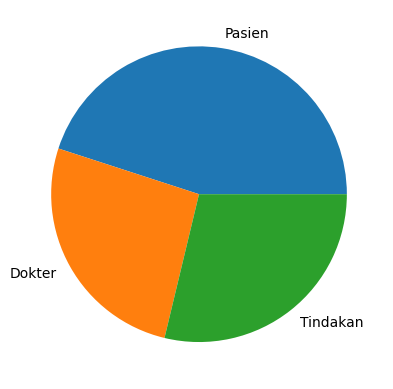

In [ ]:
import matplotlib.pyplot as plt

plt.pie(final_dataset.isnull().sum().values, labels = final_dataset.isnull().sum().index)
plt.show()

**Extra Exploration**

In [ ]:
final_dataset['Pasien'].value_counts()

Dodi Prasetyo       27
Sri Wahyuni          7
Bagus Purnama        5
Sophia Wijaya        5
Dian Permadi         4
Lusi Rahmawati       4
Iqbal Satria         4
Sri Utami            4
Fitriani Sari        4
Ahmad Surya          4
Nisa Indah           3
Fitri Novitasari     3
Lita Purnama         3
Mega Utami           3
Dian Kusuma          3
Rizki Pratama        2
Noah Santoso         2
Maya Anderson        2
Ayu Lestari          2
Nurul Hikmah         2
Hendra Nugraha       2
Yuni Kusumawati      2
Andika Pratama       2
Ratna Wulandari      2
Galang Wijaya        2
Dimas Setiadi        1
Dian Saputri         1
James Kim            1
Nita Permadi         1
Arief Susanto        1
Isabella Pratama     1
Aria Davis           1
David Tan            1
Bayu Wibowo          1
Budi Smith           1
Mia Johnson          1
Andi Saputra         1
Dwi Setiawan         1
Arifin Saputra       1
Nurul Hidayah        1
Irma Pratiwi         1
Guntur Kusuma        1
Anita Cahyani        1
Name: Pasie

In [ ]:
final_dataset['Dokter'].value_counts()

dr Yudhistya SpOG    58
Yudhistya            17
Dr Yoshua             9
Feri                  3
abs                   2
dr.sanny              2
[Isi Nama Anda]       2
dr_lukman             2
Welly                 1
dr. SLAMET            1
Name: Dokter, dtype: int64

In [ ]:
final_dataset['Dokter'].replace('[Isi Nama Anda]', method = 'ffill', inplace = True)
final_dataset['Dokter'].value_counts()

dr Yudhistya SpOG    47
Yudhistya            15
Dr Yoshua             6
Feri                  3
abs                   2
dr.sanny              2
dr_lukman             2
Welly                 1
dr. SLAMET            1
Name: Dokter, dtype: int64

In [ ]:
final_dataset['Tindakan'].value_counts()

Umum                                   56
Konsultasi  USG                         3
Umum USG                                3
konsultasi dokter umum                  1
obat 3 macam konsultasi dokter umum     1
3 madam obat konsultasi dokter umum     1
JASA DOKTER                             1
Konsultasi                              1
Konsultasi                              1
USG Konsultasi                          1
Umum USG VT                             1
periksa spog bpjs                       1
Umum obat 3 macam                       1
Umum Periksa Dokter                     1
Umum SC KELAS 2 USG                     1
Umum periksa spog bpjs SC               1
Umum periksa spog bpjs                  1
Injeksi kolesterol asam urat gula       1
Name: Tindakan, dtype: int64

In [ ]:
final_dataset['Tindakan'].replace('Konsultasi ', 'Konsultasi', inplace = True)
final_dataset['Tindakan'].replace('3 madam obat konsultasi dokter umum', 'obat 3 macam konsultasi dokter umum', inplace = True)
final_dataset['Tindakan'].replace('JASA DOKTER', 'Konsultasi', inplace = True)
final_dataset['Tindakan'].replace('Periksa Dokter', 'Konsultasi', inplace = True)
final_dataset['Tindakan'].replace('konsultasi dokter umum', 'Konsultasi', inplace = True)
final_dataset['Tindakan'].replace('USG Konsultasi', 'Konsultasi USG', inplace = True)
final_dataset['Tindakan'].value_counts()

Umum                                   56
Konsultasi                              4
Umum USG                                3
Konsultasi  USG                         3
obat 3 macam konsultasi dokter umum     2
Umum USG VT                             1
Umum periksa spog bpjs                  1
Umum periksa spog bpjs SC               1
Umum SC KELAS 2 USG                     1
Umum Periksa Dokter                     1
Umum obat 3 macam                       1
periksa spog bpjs                       1
USG Konsultasi                          1
Injeksi kolesterol asam urat gula       1
Name: Tindakan, dtype: int64

In [ ]:
final_dataset.fillna(method = 'ffill', inplace = True)
final_dataset

,Pasien,Dokter,Tindakan
0,Sri Wahyuni,Yudhistya,Umum
1,Dian Kusuma,Yudhistya,Umum
2,Ahmad Surya,Yudhistya,Umum
3,Dian Kusuma,Yudhistya,Umum
4,Dian Kusuma,Yudhistya,Umum
...,...,...,...
95,Dodi Prasetyo,Dr Yoshua,Konsultasi
96,Dodi Prasetyo,Dr Yoshua,Konsultasi
97,Dodi Prasetyo,Dr Yoshua,Injeksi kolesterol asam urat gula
98,Nurul Hikmah,Yudhistya,Injeksi kolesterol asam urat gula


##**Visualization**##

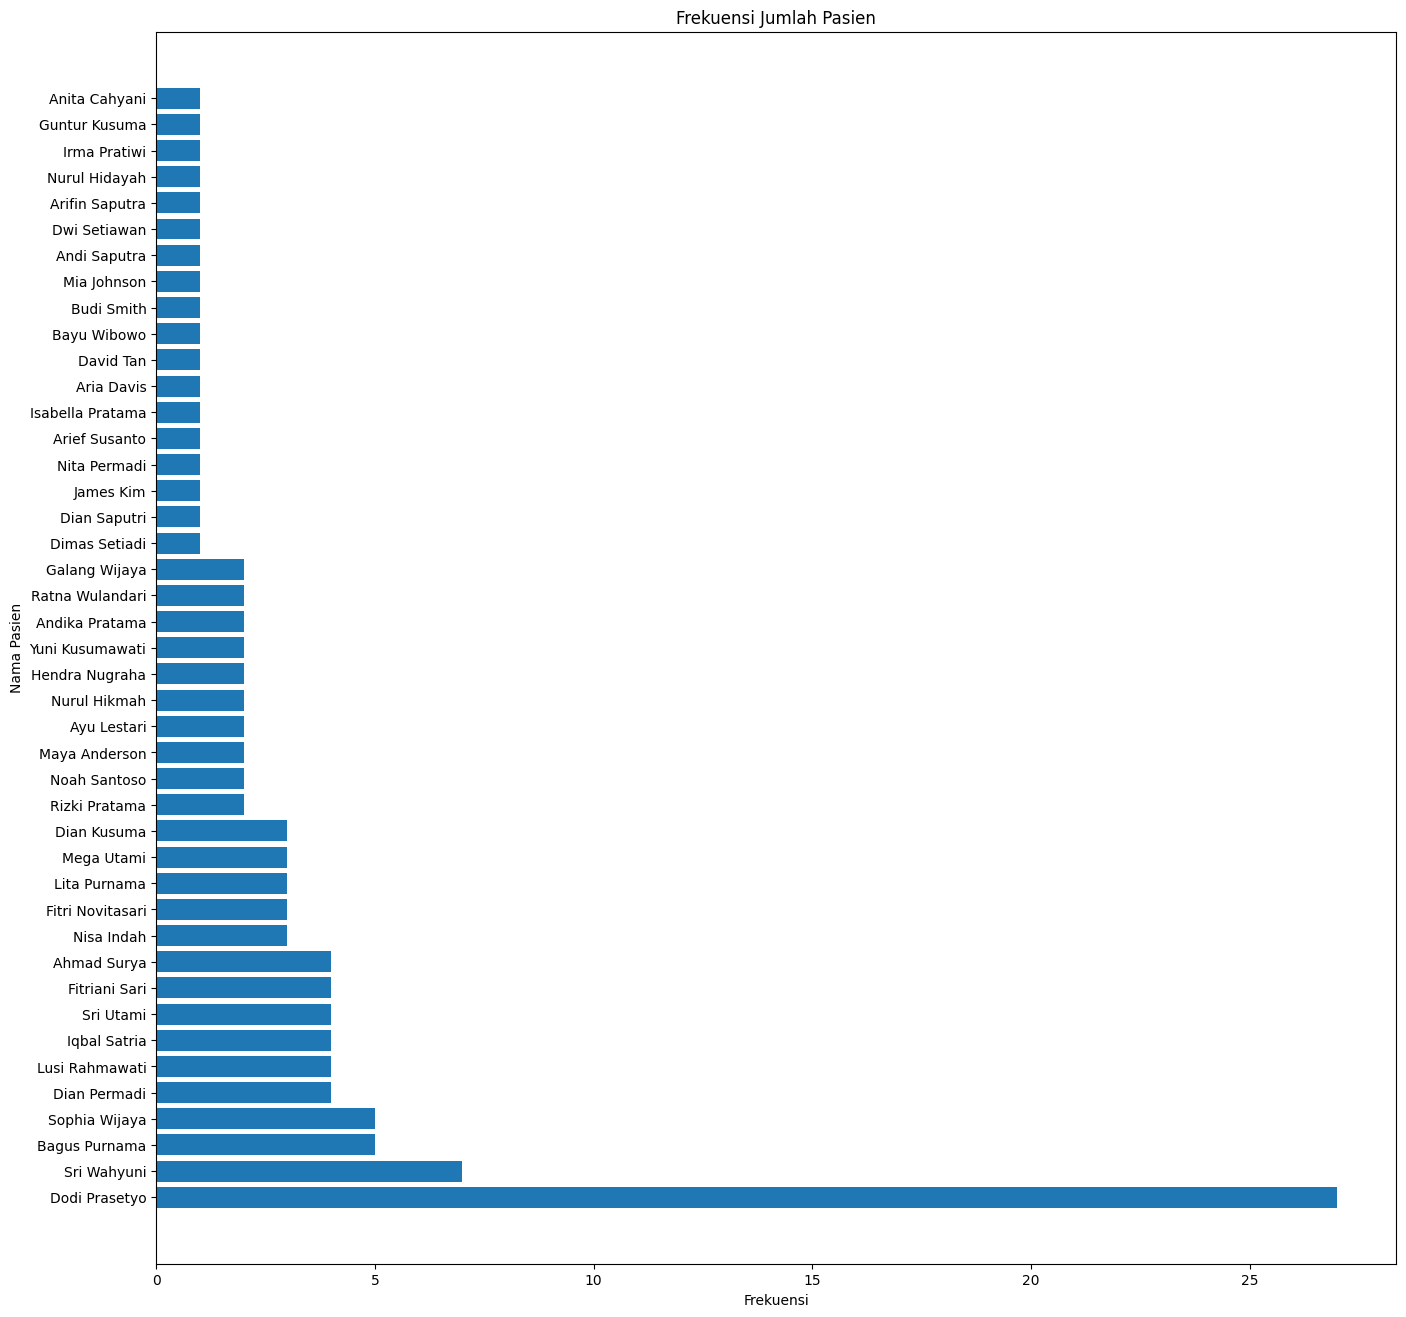

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,16))
plt.barh(final_dataset['Pasien'].value_counts().index, final_dataset['Pasien'].value_counts().values)
plt.title('Frekuensi Jumlah Pasien')
plt.xlabel('Frekuensi')
plt.ylabel('Nama Pasien')
plt.show()

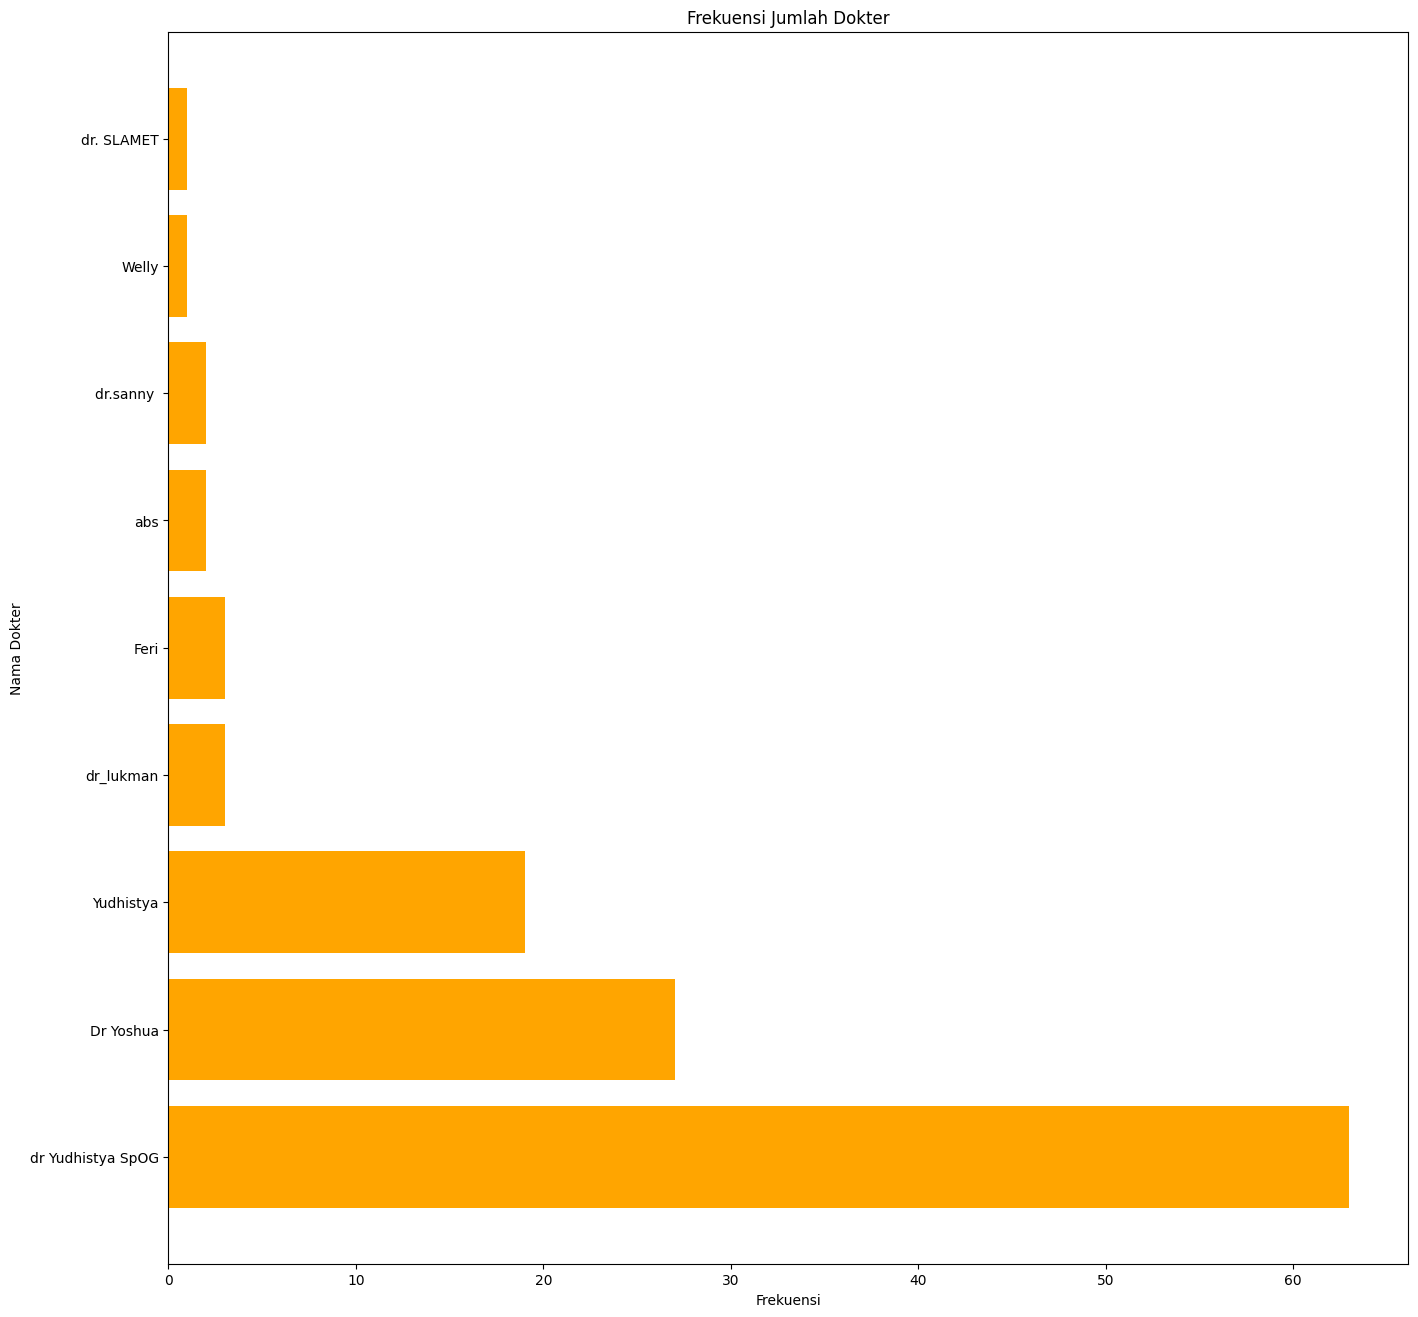

In [ ]:
plt.figure(figsize = (16,16))
plt.barh(final_dataset['Dokter'].value_counts().index, final_dataset['Dokter'].value_counts().values, color = 'orange')
plt.title('Frekuensi Jumlah Dokter')
plt.xlabel('Frekuensi')
plt.ylabel('Nama Dokter')
plt.show()

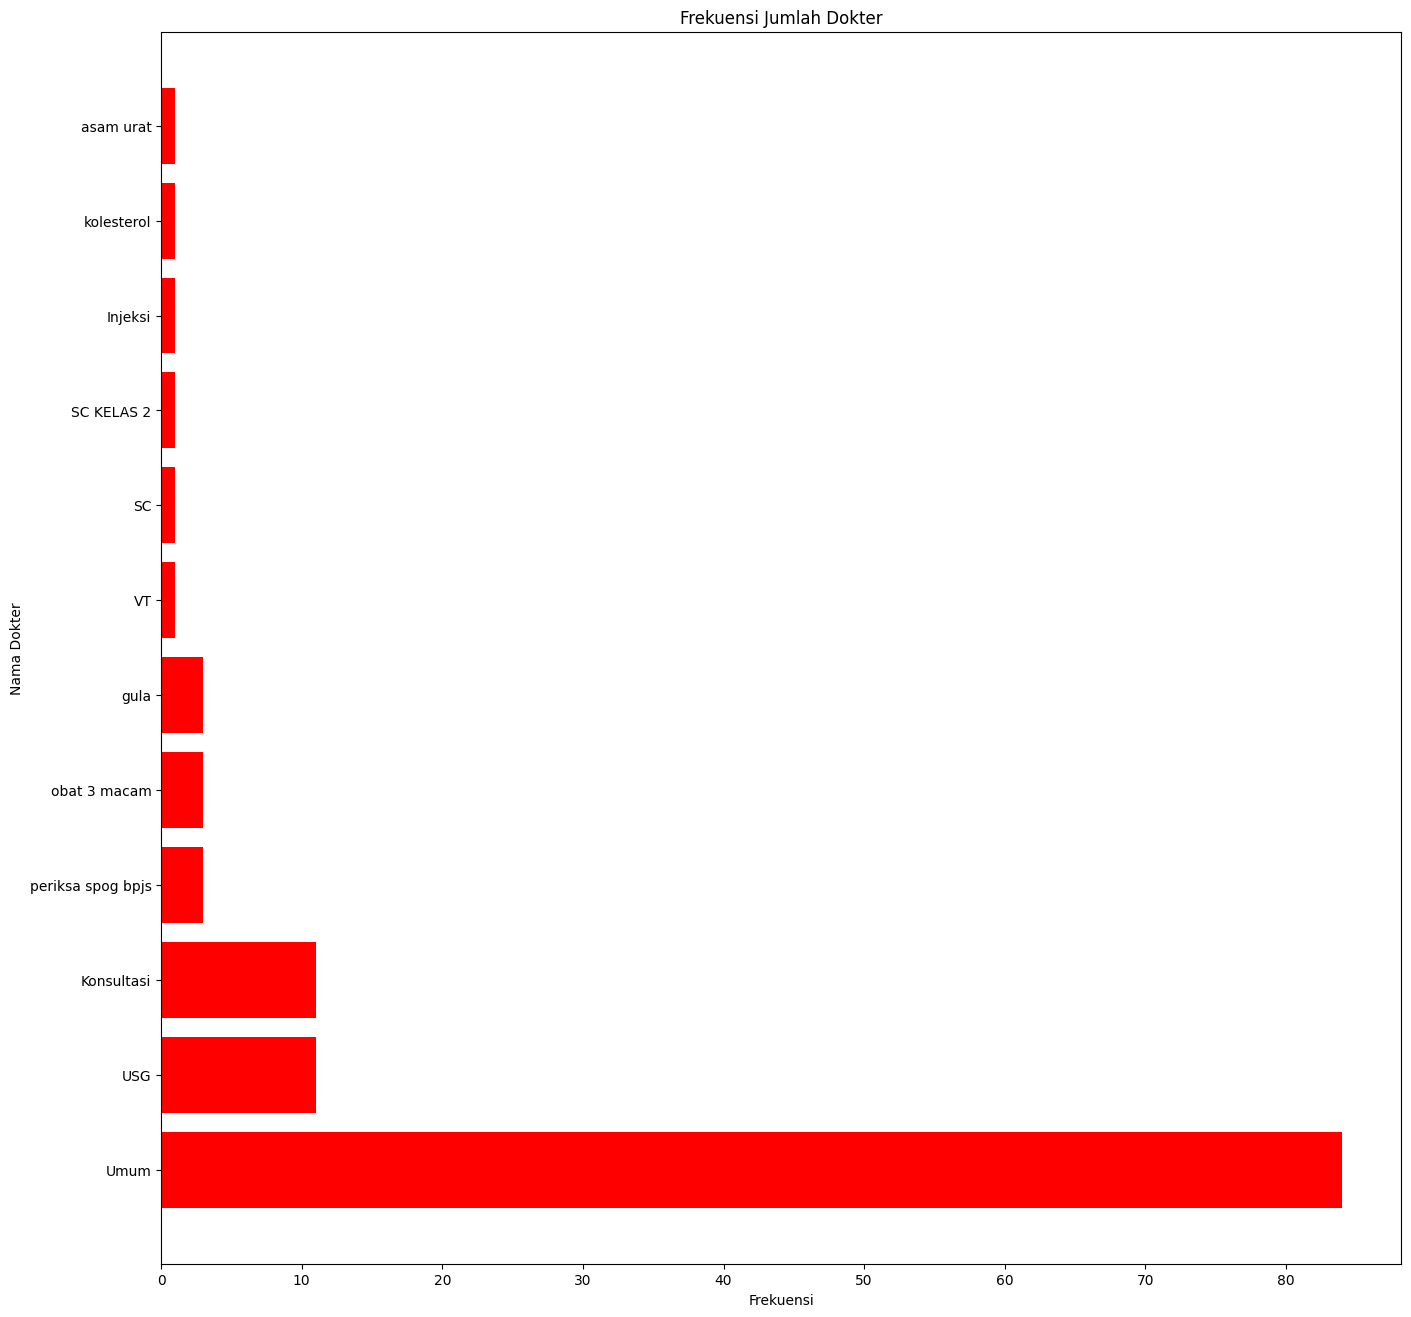

In [ ]:
plt.figure(figsize = (16,16))
plt.barh(final_dataset['Tindakan'].value_counts().index, final_dataset['Tindakan'].value_counts().values, color = 'red')
plt.title('Frekuensi Jumlah Dokter')
plt.xlabel('Frekuensi')
plt.ylabel('Nama Dokter')
plt.show()

## **Preprocessing**

**Add New Column**

In [ ]:
final_dataset['Gabungan'] = final_dataset['Pasien'] + ' ' + final_dataset['Dokter'] + ' ' + final_dataset['Tindakan']
final_dataset

,Pasien,Dokter,Tindakan,Gabungan
0,Sri Wahyuni,Yudhistya,Umum,Sri Wahyuni Yudhistya Umum
1,Dian Kusuma,Yudhistya,Umum,Dian Kusuma Yudhistya Umum
2,Ahmad Surya,Yudhistya,Umum,Ahmad Surya Yudhistya Umum
3,Dian Kusuma,Yudhistya,Umum,Dian Kusuma Yudhistya Umum
4,Dian Kusuma,Yudhistya,Umum,Dian Kusuma Yudhistya Umum
...,...,...,...,...
95,Dodi Prasetyo,Dr Yoshua,Konsultasi,Dodi Prasetyo Dr Yoshua Konsultasi
96,Dodi Prasetyo,Dr Yoshua,Konsultasi,Dodi Prasetyo Dr Yoshua Konsultasi
97,Dodi Prasetyo,Dr Yoshua,Injeksi kolesterol asam urat gula,Dodi Prasetyo Dr Yoshua Injeksi kolesterol asa...
98,Nurul Hikmah,Yudhistya,Injeksi kolesterol asam urat gula,Nurul Hikmah Yudhistya Injeksi kolesterol asam...


**Lowercasing**

In [ ]:
final_dataset.columns

Index(['Pasien', 'Dokter', 'Tindakan', 'Gabungan'], dtype='object')

In [ ]:
for i in final_dataset.columns:
  final_dataset[i] = final_dataset[i].str.lower()

final_dataset

,Pasien,Dokter,Tindakan,Gabungan
0,sri wahyuni,yudhistya,umum,sri wahyuni yudhistya umum
1,dian kusuma,yudhistya,umum,dian kusuma yudhistya umum
2,ahmad surya,yudhistya,umum,ahmad surya yudhistya umum
3,dian kusuma,yudhistya,umum,dian kusuma yudhistya umum
4,dian kusuma,yudhistya,umum,dian kusuma yudhistya umum
...,...,...,...,...
95,dodi prasetyo,dr yoshua,konsultasi,dodi prasetyo dr yoshua konsultasi
96,dodi prasetyo,dr yoshua,konsultasi,dodi prasetyo dr yoshua konsultasi
97,dodi prasetyo,dr yoshua,injeksi kolesterol asam urat gula,dodi prasetyo dr yoshua injeksi kolesterol asa...
98,nurul hikmah,yudhistya,injeksi kolesterol asam urat gula,nurul hikmah yudhistya injeksi kolesterol asam...


**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(final_dataset['Gabungan'])
X

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 568 stored elements in Compressed Sparse Row format>

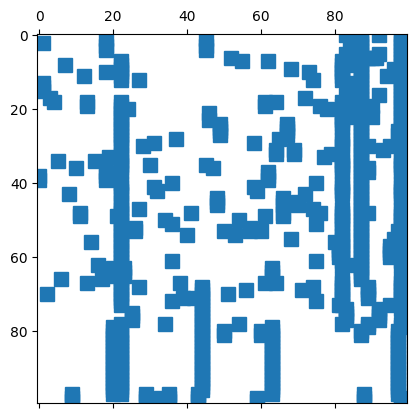

In [ ]:
plt.spy(X)

In [ ]:
import numpy as np

total_elements = X.size
non_zero_elements = np.sum(X < 0.9)
normalized_area = non_zero_elements / total_elements

print("Normalized Area:", normalized_area)

Normalized Area: 17.6056338028169


## **BM 25 Implementation (with Library)**

In [ ]:
final_dataset['Gabungan']

0                            sri wahyuni yudhistya umum
1                            dian kusuma yudhistya umum
2                            ahmad surya yudhistya umum
3                            dian kusuma yudhistya umum
4                            dian kusuma yudhistya umum
                            ...                        
95                   dodi prasetyo dr yoshua konsultasi
96                   dodi prasetyo dr yoshua konsultasi
97    dodi prasetyo dr yoshua injeksi kolesterol asa...
98    nurul hikmah yudhistya injeksi kolesterol asam...
99    nurul hikmah yudhistya injeksi kolesterol asam...
Name: Gabungan, Length: 100, dtype: object

In [ ]:
from rank_bm25 import BM25Okapi
import numpy as np

tokenized_corpus = [doc.split(" ") for doc in final_dataset['Gabungan']]

bm25 = BM25Okapi(tokenized_corpus)

In [ ]:
def get_most_similar_n(query, df, n):
  tokenized_query = query.split(" ")

  doc_scores = bm25.get_scores(tokenized_query)
  result = bm25.get_top_n(tokenized_query, df, n)
  scores = bm25.get_scores(tokenized_query)
  sorted_scores = np.sort(scores)[::-1]
  output_score = sorted_scores[:len(result)]
  output = pd.DataFrame()
  patient, doctor, treatment = [], [], []
  for i in range(len(result)):
    patient.append(result[i][0])
    doctor.append(result[i][1])
    treatment.append(result[i][2])
  output['Patient'] = patient
  output['Doctor'] = doctor
  output['Treatment'] = treatment
  output['Score'] = output_score
  return output

In [ ]:
def get_top_n_doctor(query, df, n):
  tokenized_query = query.split(" ")
  tokenized_corpus = [doc.split(" ") for doc in final_dataset['Gabungan']]

  bm25 = BM25Okapi(tokenized_corpus)
  doc_scores = bm25.get_scores(tokenized_query)
  result = bm25.get_top_n(tokenized_query, df, n)
  scores = bm25.get_scores(tokenized_query)
  sorted_scores = np.sort(scores)[::-1]
  output_score = sorted_scores[:len(result)]
  output = pd.DataFrame()
  doctor, treatment = [], []
  for i in range(len(result)):
    doctor.append(result[i][1])
  output['Doctor'] = doctor
  output['Score'] = output_score
  return output

In [ ]:
def get_top_n_patient(query, df, n):
  tokenized_query = query.split(" ")

  doc_scores = bm25.get_scores(tokenized_query)
  result = bm25.get_top_n(tokenized_query, df, n)
  scores = bm25.get_scores(tokenized_query)
  sorted_scores = np.sort(scores)[::-1]
  output_score = sorted_scores[:len(result)]
  output = pd.DataFrame()
  patient = []
  for i in range(len(result)):
    patient.append(result[i][1])
  output['Patient'] = patient
  output['Score'] = output_score
  return output

In [ ]:
def get_top_n_treatment(query, df, n):
  tokenized_query = query.split(" ")

  doc_scores = bm25.get_scores(tokenized_query)
  result = bm25.get_top_n(tokenized_query, df, n)
  scores = bm25.get_scores(tokenized_query)
  sorted_scores = np.sort(scores)[::-1]
  output_score = sorted_scores[:len(result)]
  output = pd.DataFrame()
  treatment = []
  for i in range(len(result)):
    treatment.append(result[i][2])
  output['Treatment'] = treatment
  output['Score'] = output_score
  return output

In [ ]:
def get_general():
  query = str(input('Input the Query: '))
  number = int(input('Input the number of top docs that you want to retrieve: '))
  out = get_most_similar_n(query, df, number)
  return out

In [ ]:
def get_doctor_from_patient():
  query = str(input('Input the name of patient: '))
  #if query.lower() not in final_dataset['Pasien'].unique():
    #return 'There is no patient with the name that you have inputted'
  #else:
  number = int(input('Input the number of top docs that you want to retrieve: '))
  out = get_top_n_doctor(query, df, number)
  return out

In [ ]:
def get_patient_from_treatment():
  query = str(input('Input the name of treatment: '))
  #if query.lower() not in final_dataset['Tindakan'].unique():
    #return 'There is no treatment with the name that you have inputted'
  #else:
  number = int(input('Input the number of top docs that you want to retrieve: '))
  out = get_top_n_patient(query, df, number)
  return out

In [ ]:
def get_treatment_from_doctor():
  query = str(input('Input the name of doctor: '))
  #if query.lower() not in final_dataset['Dokter'].unique():
    #return 'There is no doctor with the name that you have inputted'
  #else:
  number = int(input('Input the number of top docs that you want to retrieve: '))
  out = get_top_n_treatment(query, df, number)
  return out

In [ ]:
def get_doctor_from_treatment():
  query = str(input('Input the name of treatment: '))
  #if query.lower() not in final_dataset['Tindakan'].unique():
    #return 'There is no treatment with the name that you have inputted'
  #else:
  number = int(input('Input the number of top docs that you want to retrieve: '))
  out = get_top_n_doctor(query, df, number)
  return out

In [ ]:
final_dataset['Pasien']

0       sri wahyuni
1       dian kusuma
2       ahmad surya
3       dian kusuma
4       dian kusuma
          ...      
95    dodi prasetyo
96    dodi prasetyo
97    dodi prasetyo
98     nurul hikmah
99     nurul hikmah
Name: Pasien, Length: 100, dtype: object

In [ ]:
query = str(input('Input the Query: '))
number = int(input('Input the number of top docs that you want to retrieve: '))
out = get_most_similar_n(query, df, number)
out

Input the Query: yudhistya
Input the number of top docs that you want to retrieve: 10


,Patient,Doctor,Treatment,Score
0,sri wahyuni,yudhistya,umum,0.997219
1,ahmad surya,yudhistya,umum,0.997219
2,lita purnama,yudhistya,umum,0.997219
3,sri wahyuni,yudhistya,konsultasi,0.997219
4,andi saputra,yudhistya,umum,0.997219
5,sri wahyuni,yudhistya,umum,0.997219
6,ahmad surya,yudhistya,umum,0.997219
7,ahmad surya,yudhistya,umum,0.997219
8,dian kusuma,yudhistya,umum,0.997219
9,sri wahyuni,yudhistya,umum,0.997219


In [ ]:
def main_menu():
  print('The ranked retrieval system that have been developed consist of as follows: ')
  print('1. Search anything related to the doctor, patient, and treatment')
  print('2. Search the doctor that handles particular patient')
  print('3. Search list of patients that took particular treatment')
  print('4. Search list of treatment that could be done by particular doctor')
  print('5. Search list of doctor that took particular treatment')
  choice = int(input('What do you want?'))
  if choice == 1:
    output = get_general()
    print(output)
  elif choice == 2:
    output = get_doctor_from_patient()
    print(output)
  elif choice == 3:
    output = get_patient_from_treatment()
    print(output)
  elif choice == 4:
    output = get_treatment_from_doctor()
    print(output)
  elif choice == 5:
    output = get_doctor_from_treatment()
    print(output)
  else:
    print('Please specify what do you want')
    choice = int(input('What do you want?'))

In [ ]:
main_menu()

The ranked retrieval system that have been developed consist of as follows: 
1. Search anything related to the doctor, patient, and treatment
2. Search the doctor that handles particular patient
3. Search list of patients that took particular treatment
4. Search list of treatment that could be done by particular doctor
5. Search list of doctor that took particular treatment
What do you want?5
Input the name of treatment: konsultasi jantung
Input the number of top docs that you want to retrieve: 5
      Doctor     Score
0       feri  1.029654
1  yudhistya  1.029654
2       feri  1.029654
3       feri  1.029654
4  dr yoshua  0.944566


## **Performance Evaluation**

**Obtain the Document**

In [ ]:
dataset = final_dataset[['Pasien', 'Dokter', 'Tindakan']]

In [ ]:
df = []
for i in range(len(dataset)):
  df_col = []
  for j in dataset.columns:
    df_col.append(dataset[j][i].lower())
  df.append(df_col)

In [ ]:
import math
from collections import Counter

class BM25:
    def __init__(self, corpus, k1=1.5, b=0.75):
        self.corpus = corpus
        self.k1 = k1
        self.b = b
        self.doc_lengths = [len(doc) for doc in corpus]
        self.avg_doc_length = sum(self.doc_lengths) / len(corpus)
        self.doc_freqs = self.calculate_doc_freqs()

    def calculate_doc_freqs(self):
        doc_freqs = Counter()
        for doc in self.corpus:
            doc_freqs.update(set(doc))
        return doc_freqs

    def idf(self, term):
        num_docs_containing_term = self.doc_freqs[term]
        return math.log((len(self.corpus) - num_docs_containing_term + 0.5) / (num_docs_containing_term + 0.5) + 1.0)

    def score(self, query, doc):
        score = 0
        for term in query:
            if term in doc:
                tf = doc.count(term)
                idf_term = self.idf(term)
                numerator = tf * (self.k1 + 1)
                denominator = tf + self.k1 * (1 - self.b + self.b * len(doc) / self.avg_doc_length)
                score += idf_term * numerator / denominator
        return score

    def precision_at_k(self, query, true_doc, k):
        scores = [self.score(query, doc) for doc in self.corpus]
        ranked_docs = [doc for _, doc in sorted(zip(scores, self.corpus), reverse=True)]
        top_k_docs = ranked_docs[:k]
        relevant_docs = sum(1 for doc in top_k_docs if doc == true_doc)
        try:
          return relevant_docs / k
        except:
          return 'The precision is undefined'

    def recall_at_k(self, query, true_doc, k):
        scores = [self.score(query, doc) for doc in self.corpus]
        ranked_docs = [doc for _, doc in sorted(zip(scores, self.corpus), reverse=True)]
        top_k_docs = ranked_docs[:k]
        relevant_docs = sum(1 for doc in top_k_docs if doc == true_doc)
        try:
          return relevant_docs / len(true_doc)
        except:
          return 'The recall is undefined'

    def f1_score_at_k(self, query, true_doc, k):
      try:
        precision = self.precision_at_k(query, true_doc, k)
        recall = self.recall_at_k(query, true_doc, k)
        return 2 * (precision * recall) / (precision + recall)
      except:
        return 'The value of Precision or Recall is 0'

    def mean_average_precision(self, query, true_doc):
        scores = [self.score(query, doc) for doc in self.corpus]
        ranked_docs = [doc for _, doc in sorted(zip(scores, self.corpus), reverse=True)]
        avg_precision = 0
        num_relevant = 0

        for i, doc in enumerate(ranked_docs):
            if doc == true_doc:
                num_relevant += 1
                precision_at_i = num_relevant / (i + 1)
                avg_precision += precision_at_i
        try:
          return avg_precision / num_relevant if num_relevant > 0 else 0
        except:
          return 'The value of Mean Average Precision is undefined'

    def ndcg_at_k(self, query, true_doc, k):
        scores = [self.score(query, doc) for doc in self.corpus]
        ranked_docs = [doc for _, doc in sorted(zip(scores, self.corpus), reverse=True)]
        dcg = 0
        idcg = sum(1 / math.log(i + 2, 2) for i in range(min(k, len(true_doc))))

        for i, doc in enumerate(ranked_docs[:k]):
            if doc == true_doc:
                dcg += 1 / math.log(i + 2, 2)
        try:
          return dcg / idcg if idcg > 0 else 0
        except:
          return 'The value of ndcg is undefined'

In [ ]:
from rank_bm25 import BM25Okapi

tokenized_corpus = [doc.split(" ") for doc in final_dataset['Gabungan'].str.lower()]

bm25 = BM25Okapi(tokenized_corpus)

In [ ]:
def performance_evaluation(patient, doctor, treatment):
  tokenized_query = []
  tokenized_query.extend([patient, doctor, treatment])
  true_doc = bm25.get_top_n(tokenized_query, df, 1)[0]
  precision, recall, f1score, map, ndcg = [], [], [], [], []
  result = pd.DataFrame()
  print("The inputted query: ", tokenized_query)
  print("Most similar docs: ", true_doc)
  for i in range (10):
    precision.append(bm25_model.precision_at_k(tokenized_query, true_doc, i))
    recall.append(bm25_model.recall_at_k(tokenized_query, true_doc, i))
    f1score.append(bm25_model.f1_score_at_k(tokenized_query, true_doc, i))
    ndcg.append(bm25_model.ndcg_at_k(tokenized_query, true_doc, i))
  result['Precision @K'] = precision
  result['Recall @K'] = recall
  result['F1 Score @K'] = f1score
  result['NDGC @K'] = ndcg
  return result

In [ ]:
corpus = df
bm25_model = BM25(corpus)
query1 = str(input('Input the patient name: '))
query2 = str(input('Input the doctor name: '))
query3 = str(input('Input the treatment name: '))
performance_evaluation(query1.lower(), query2.lower(), query3.lower())

Input the patient name: wahyuni
Input the doctor name: yudhistya
Input the treatment name: usg
The inputted query:  ['wahyuni', 'yudhistya', 'usg']
Most similar docs:  ['sri wahyuni', 'yudhistya', 'umum']


,Precision @K,Recall @K,F1 Score @K,NDGC @K
0,The precision is undefined,0.000000,The value of Precision or Recall is 0,0.0
1,1.0,0.333333,0.5,1.0
2,1.0,0.666667,0.8,1.0
3,1.0,1.000000,1.0,1.0
4,0.75,1.000000,0.857143,1.0
5,0.6,1.000000,0.75,1.0
6,0.5,1.000000,0.666667,1.0
7,0.428571,1.000000,0.6,1.0
8,0.375,1.000000,0.545455,1.0
9,0.333333,1.000000,0.5,1.0
